# Buffer Stock Model

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt

# load the model module
from MPCFModel import MPCFClass
import figs

**Create figs/**

In [2]:
if not os.path.isdir('figs'): os.mkdir('figs')

**Choos number of threads:**

In [3]:
import numba as nb
nb.set_num_threads(8)

# Setup

In [4]:
LOAD = False
LOAD_PF = LOAD
LOAD_PERS = LOAD
LOAD_RHO = LOAD
LOAD_BETA = LOAD
LOAD_ANNUAL = LOAD
LOAD_SIGMA_XI = LOAD

# Baseline

In [5]:
def do_model(name,LOAD,postfix='',par={}):

    # a. setup
    model = MPCFClass(name=name,load=LOAD,par=par)

    if not LOAD:

        # b. solve
        model.solve()

        # c. save
        model.save()
        
    # b. cfuncs, MPC and MPCF
    figs.cfunc(model,postfix=postfix,savefig=True)
    figs.MPC(model,postfix=postfix,savefig=True)
    figs.MPCF(model,postfix=postfix,savefig=True)

    # c. simulation
    figs.simulate(model,postfix=postfix,savefig=True)

    return model    

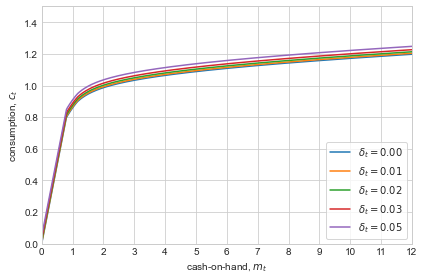

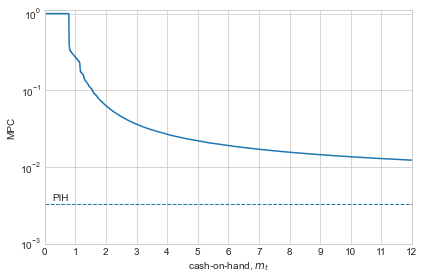

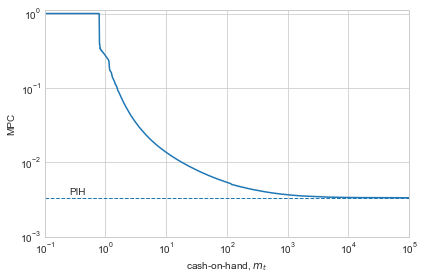

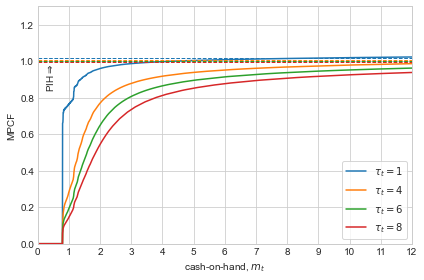

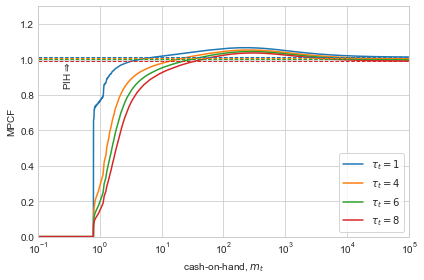

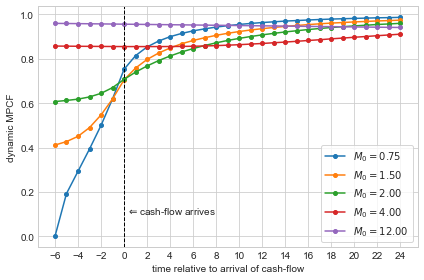

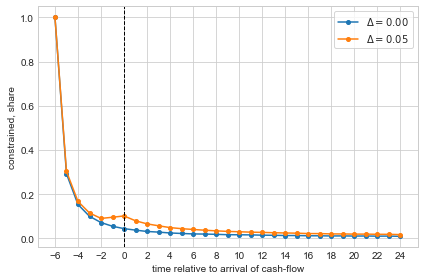

In [6]:
model = do_model('baseline',LOAD)

# Perfect forsight

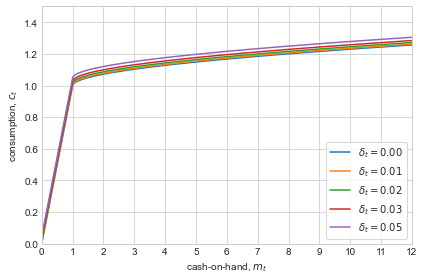

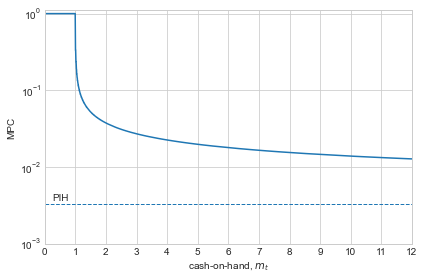

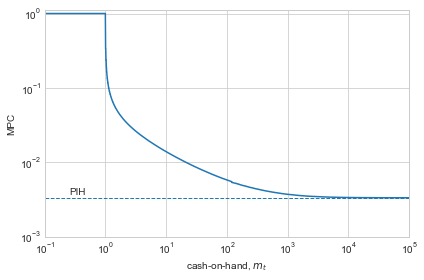

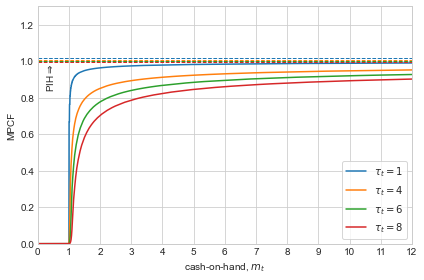

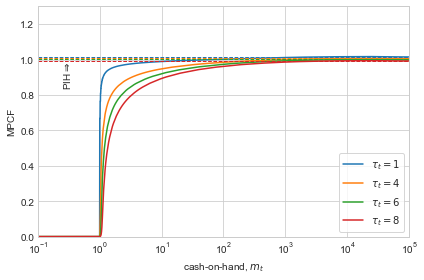

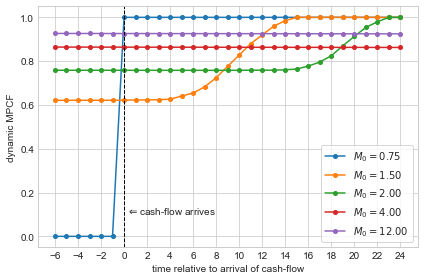

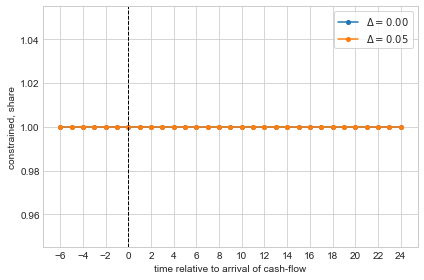

In [7]:
par = {}
par['sigma_psi'] = 0.0
par['sigma_xi'] = 0.0

model_PF = do_model('PF',LOAD_PF,postfix='_PF',par=par)

# Varying $\zeta$

In [8]:
def model_loop(basename,key,vals,basemodel,LOAD):
    
    models = []
    for i,value in enumerate(vals):
    
        print(f'{key} = {value}\n')
          
        par = {key:value}
    
        # a. setup
        models.append(MPCFClass(name=f'{basename}{i}',load=LOAD,par=par))
        
        if type(LOAD) == list:
            LOAD_ = LOAD[i]
        else:
            LOAD_ = LOAD
        
        if not LOAD_:

            # b. solve
            if i == 0:
                models[i].solve_with_c0(basemodel.sol.c[0,:,:])
            else:
                models[i].solve_with_c0(models[i-1].sol.c[0,:,:])

            # c. save
            models[i].save()
        
        # d. figures
        postfix=f'_{basename}{i}'
        figs.MPCF(models[i],postfix=postfix,savefig=True)
        figs.simulate(models[i],postfix=postfix,savefig=True)
        
        plt.show()
        print('')

zeta = 0.9991628226408794



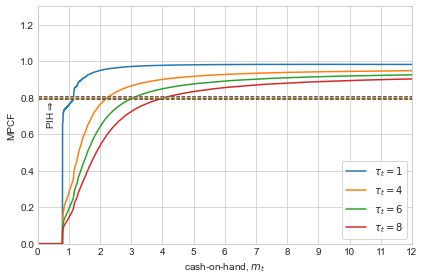

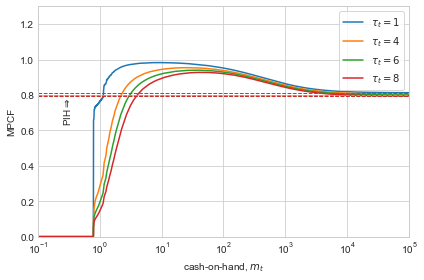

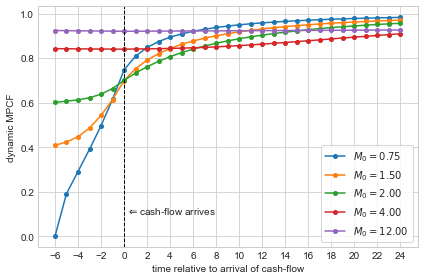

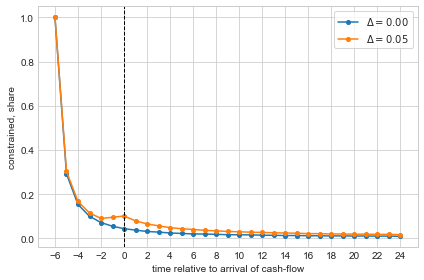


zeta = 0.9957346812224394



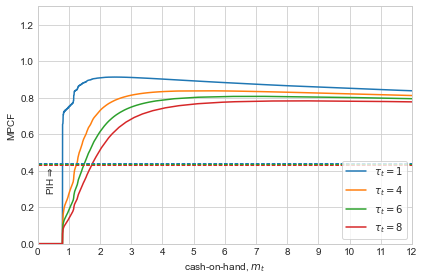

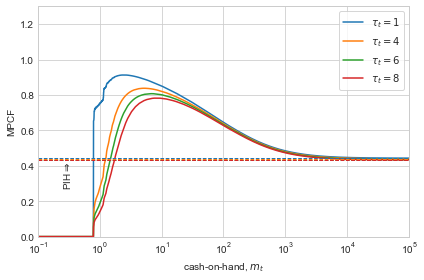

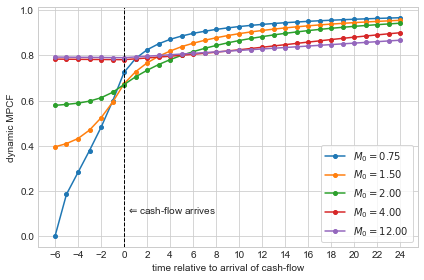

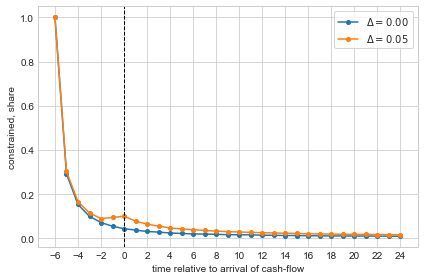


zeta = 0.9912583890453033



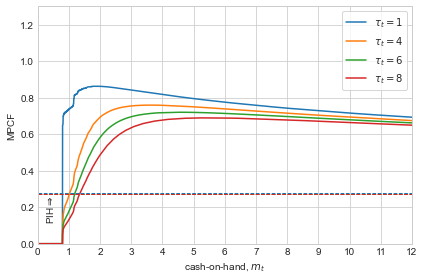

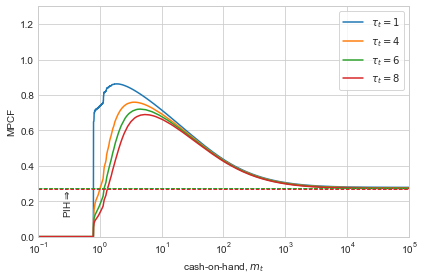

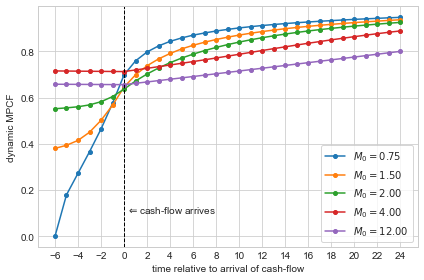

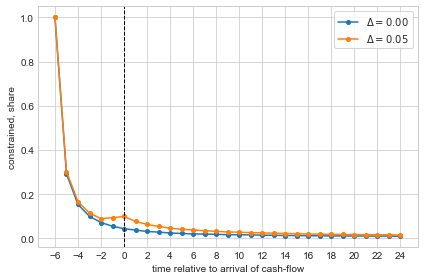

In [9]:
zetas = [0.99**(1/12),0.95**(1/12),0.90**(1/12)]
model_loop('pers','zeta',zetas,model,LOAD_PERS)

# Varying $\rho$

rho = 1.5



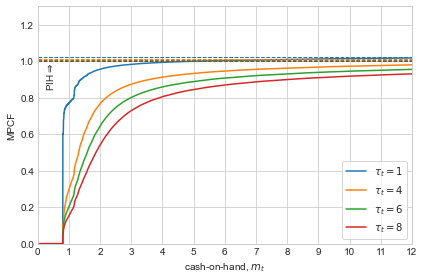

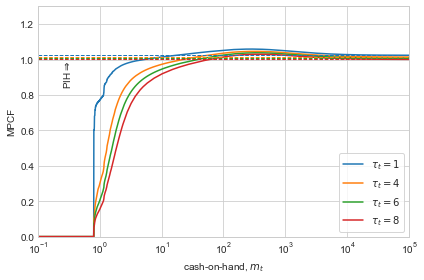

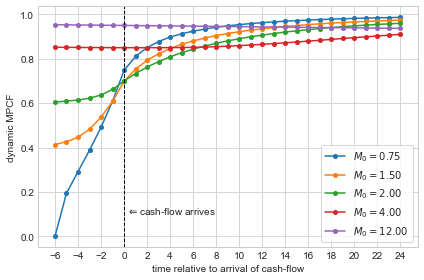

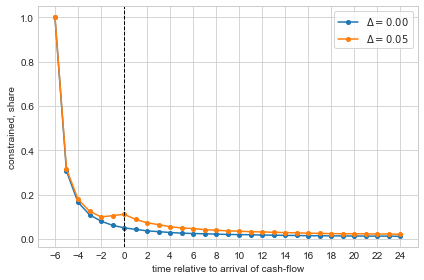


rho = 3.0



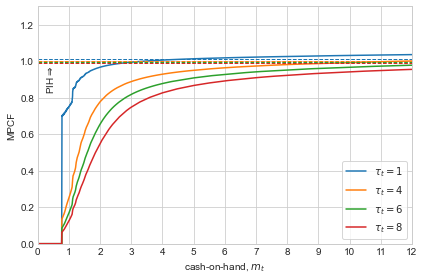

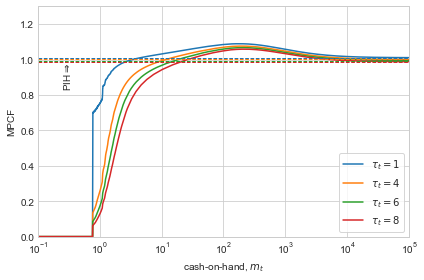

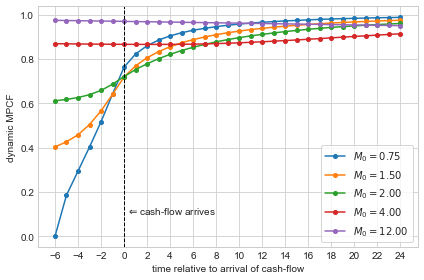

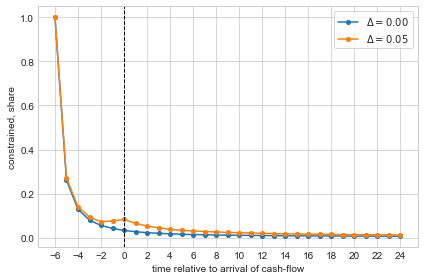


rho = 4.0



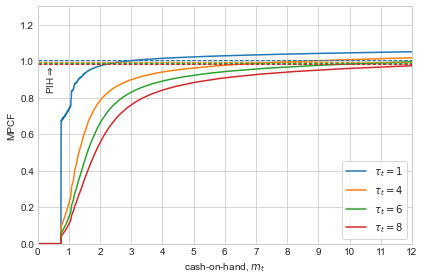

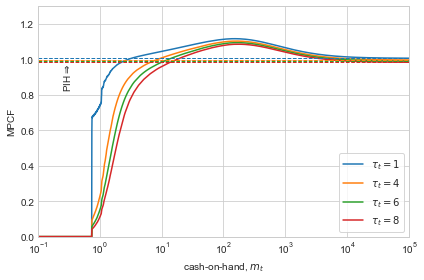

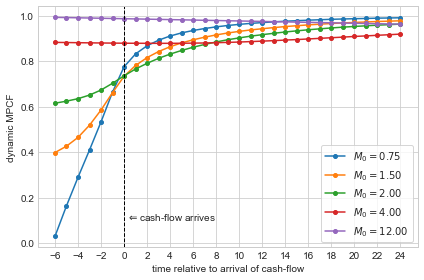

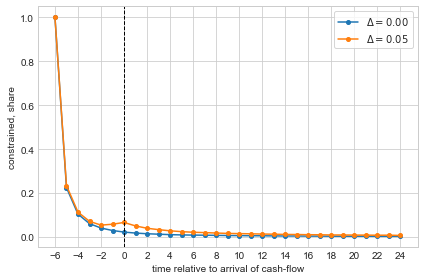

In [10]:
rhos = [1.5,3.0,4.0]
model_loop('rho','rho',rhos,model,LOAD_RHO)

# Varying $\beta$

beta = 0.9961703569836979



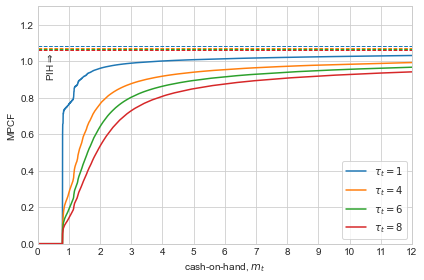

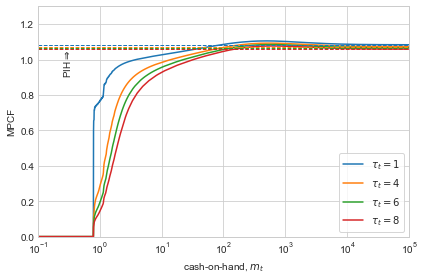

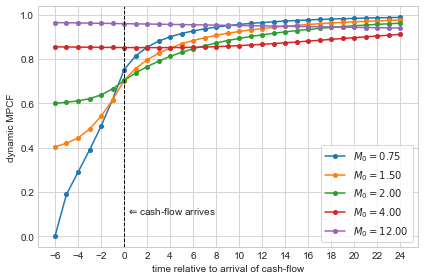

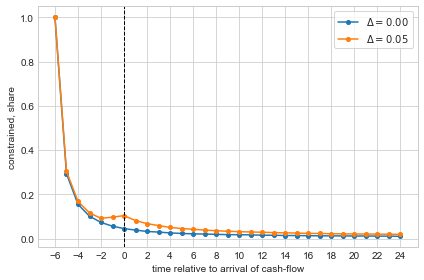


beta = 0.9952968984238537



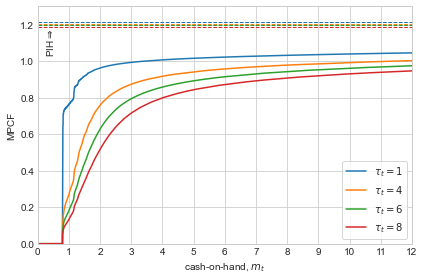

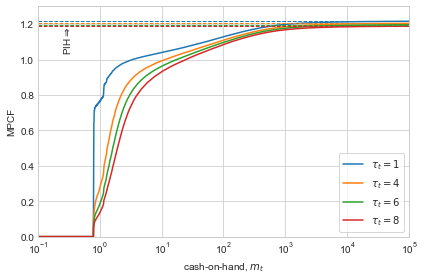

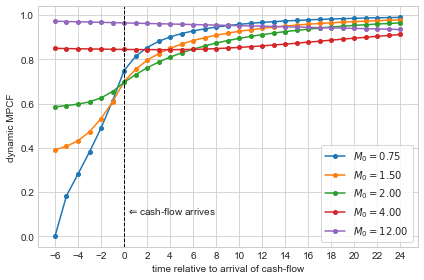

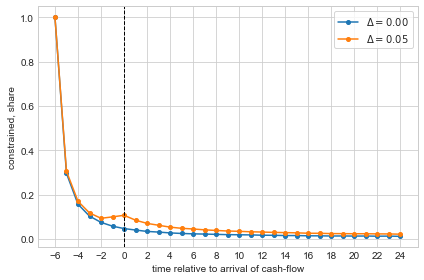


beta = 0.994856987168177



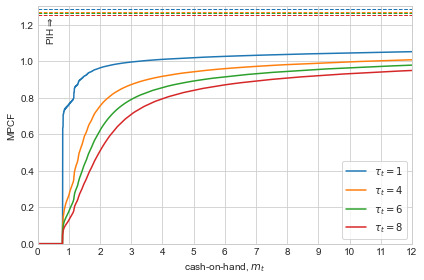

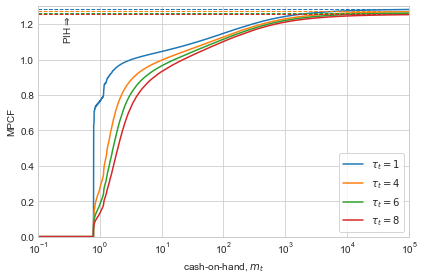

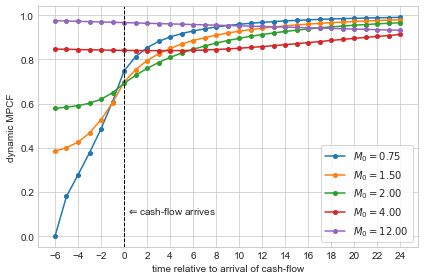

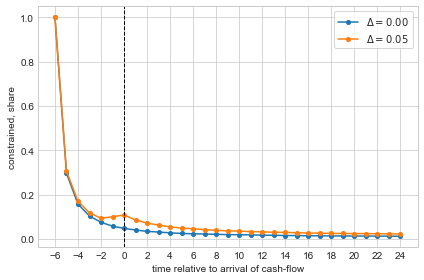

In [11]:
betas = [0.955**(1/12),0.945**(1/12),0.940**(1/12)]
model_loop('beta','beta',betas,model,LOAD_BETA)

# Varying the transitory variance

sigma_xi = 0.22360679774997896



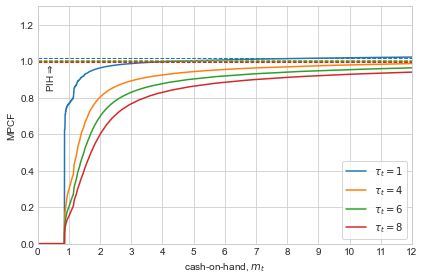

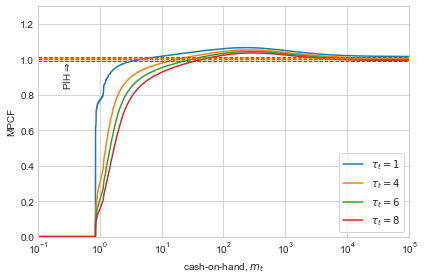

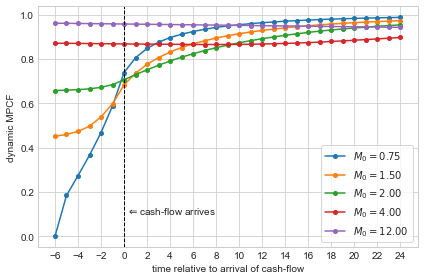

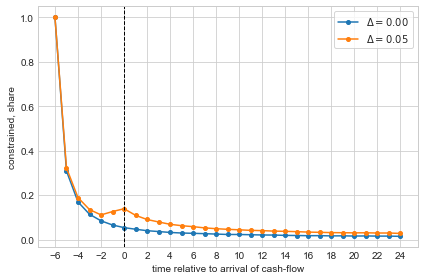


sigma_xi = 0.1



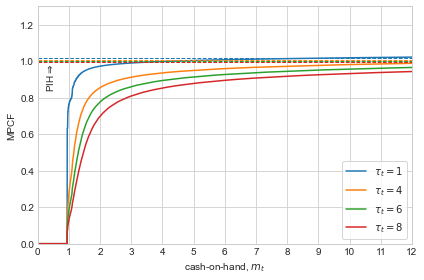

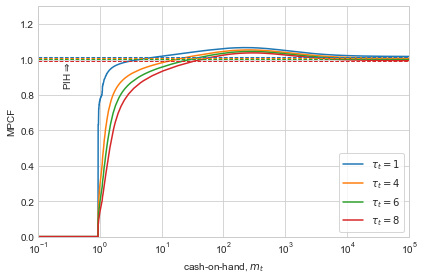

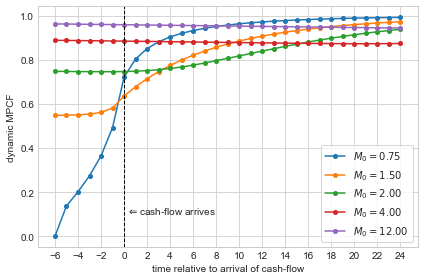

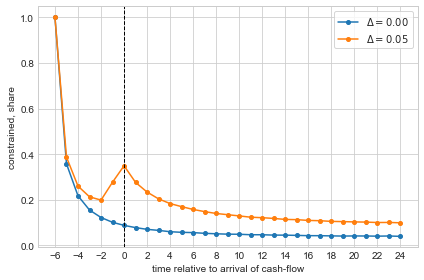


sigma_xi = 0.03162277660168379



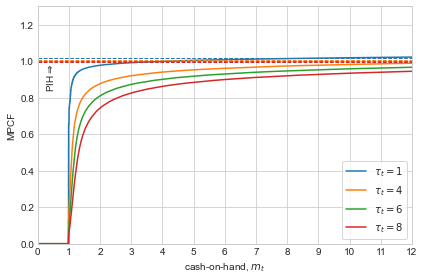

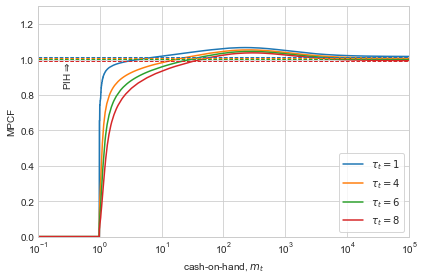

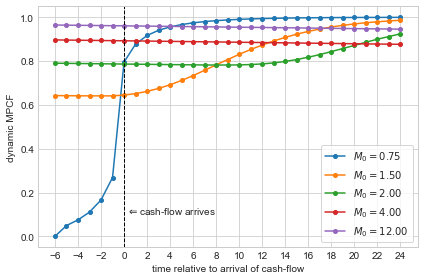

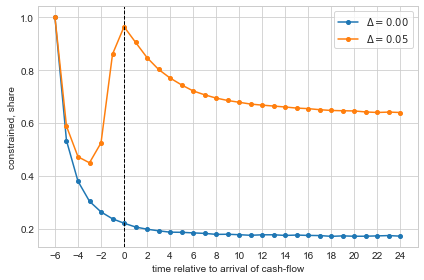

In [12]:
sigma_xis = [np.sqrt(0.05),np.sqrt(0.01),np.sqrt(0.001)]
model_loop('sigma_xi','sigma_xi',sigma_xis,model,LOAD_SIGMA_XI)

# Annual

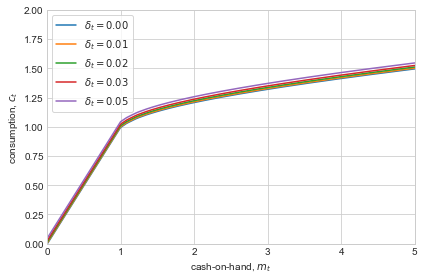

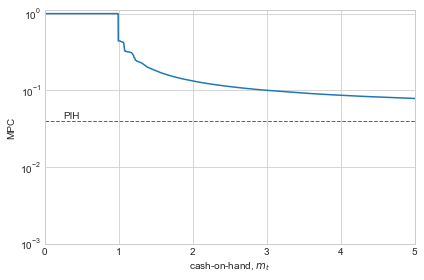

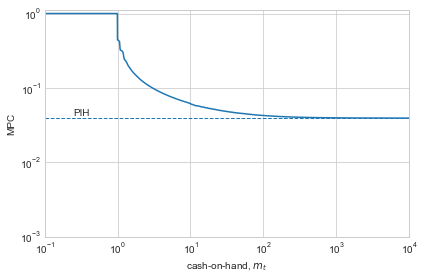

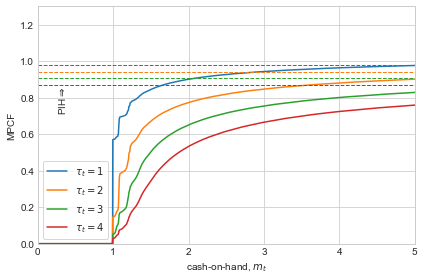

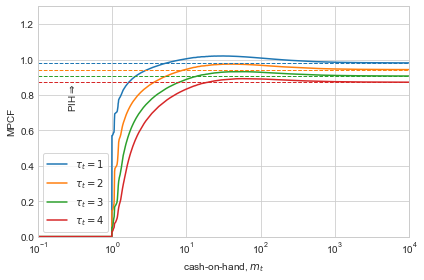

In [13]:
# a. setup
par = {}
par['beta'] = 0.96
par['R'] = 1.04
par['G'] = 1.03
par['sigma_psi'] = np.sqrt(0.0054)
par['sigma_xi'] = np.sqrt(0.0072)

par['Ndelta'] = 50
par['Nm'] = 10_000
par['m_mid'] = 10.0
par['m_max'] = 10_000.0
par['Na'] = 5_000
par['a_mid'] = par['m_mid']
par['a_max'] = par['m_max']

model_annual = MPCFClass(name='annual',load=LOAD_ANNUAL,par=par)

if not LOAD_ANNUAL:

    # b. solve
    model_annual.solve()

    # c. save
    model_annual.save()
    
    print('')

# d. figures
postfix = '_annual'
figs.cfunc(model_annual,m_max=5,c_max=2,postfix=postfix,savefig=True)
figs.MPC(model_annual,m_max=5,postfix=postfix,savefig=True)
figs.MPCF(model_annual,m_max=5,taus=[1,2,3,4],postfix=postfix,savefig=True)